📒 [NB 4-3] 범주형 변수 간 독립성 검정 (Chi-Square Test)
1. 환경 설정 및 데이터 준비
카이제곱 검정은 두 범주형 변수(Category) 간의 연관성을 파악한다.

In [1]:
!pip install pandas numpy scipy seaborn matplotlib

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

print("라이브러리 로드 완료.")

라이브러리 로드 완료.


2. 가설 설정 및 데이터 생성
시나리오: '흡연 여부(Smoking)'와 '폐암 발생 여부(Lung_Cancer)'의 관계를 분석한다.
귀무가설(H0): 흡연과 폐암 발생은 서로 독립적이다 (관련이 없다).
대립가설(H1): 흡연과 폐암 발생은 서로 관련이 있다.

In [2]:
# 데이터 생성 (총 300명)
# 흡연자(Smoker)는 폐암(Yes) 비율을 높게 설정
smokers = np.random.choice(['Cancer_Yes', 'Cancer_No'], size=150, p=[0.25, 0.75])
non_smokers = np.random.choice(['Cancer_Yes', 'Cancer_No'], size=150, p=[0.05, 0.95])

df_chi = pd.DataFrame({
    'Smoking_Status': ['Smoker']*150 + ['Non-Smoker']*150,
    'Lung_Cancer': np.concatenate([smokers, non_smokers])
})

print("데이터 미리보기:")
display(df_chi.sample(5))

데이터 미리보기:


,Smoking_Status,Lung_Cancer
242,Non-Smoker,Cancer_No
246,Non-Smoker,Cancer_No
135,Smoker,Cancer_Yes
138,Smoker,Cancer_No
89,Smoker,Cancer_No


3. 교차표 (Contingency Table) 생성
카이제곱 검정을 위해서는 빈도표(교차표)가 필요하다.

[관찰 빈도표]


Lung_Cancer,Cancer_No,Cancer_Yes
Smoking_Status,,
Non-Smoker,144,6
Smoker,114,36


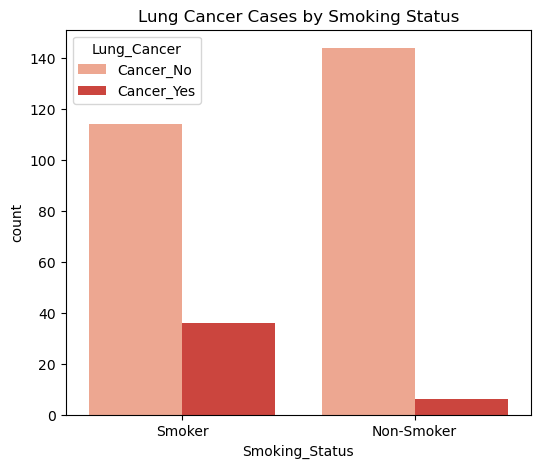

In [3]:
# pd.crosstab을 이용하여 관찰 빈도(Observed Frequency) 테이블 생성
contingency_table = pd.crosstab(df_chi['Smoking_Status'], df_chi['Lung_Cancer'])

print("[관찰 빈도표]")
display(contingency_table)

# 시각화 (Countplot)
plt.figure(figsize=(6, 5))
sns.countplot(x='Smoking_Status', hue='Lung_Cancer', data=df_chi, palette='Reds')
plt.title('Lung Cancer Cases by Smoking Status')
plt.show()

4. 카이제곱 검정 수행 (Chi-Square Test)
scipy.stats.chi2_contingency 함수는 카이제곱 통계량, P-value, 자유도, 기대 빈도를 모두 반환한다.

In [4]:
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_val:.10f}")
print(f"Degrees of Freedom: {dof}")

print("\n[기대 빈도표 (독립이라면 나왔어야 할 수치)]")
# 기대 빈도가 5 미만인 칸이 많으면 검정 결과를 신뢰하기 어렵다 (Fisher Exact Test 필요)
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns).round(2))

Chi-square statistic: 23.2835
P-value: 0.0000013979
Degrees of Freedom: 1

[기대 빈도표 (독립이라면 나왔어야 할 수치)]
Lung_Cancer     Cancer_No  Cancer_Yes
Smoking_Status                       
Non-Smoker          129.0        21.0
Smoker              129.0        21.0


5. 결과 해석

In [5]:
alpha = 0.05

if p_val < alpha:
    print(f"\n[결과] P-value({p_val:.4f})가 0.05보다 작습니다.")
    print("-> 귀무가설 기각. 흡연 여부와 폐암 발생은 통계적으로 유의미한 관련이 있습니다.")
else:
    print(f"\n[결과] P-value({p_val:.4f})가 0.05보다 큽니다.")
    print("-> 귀무가설 채택. 두 변수는 서로 독립적일 가능성이 높습니다.")


[결과] P-value(0.0000)가 0.05보다 작습니다.
-> 귀무가설 기각. 흡연 여부와 폐암 발생은 통계적으로 유의미한 관련이 있습니다.
